In [3]:
import pandas as pd
import numpy as np
from openpyxl import *
from matplotlib import *
import re

ModuleNotFoundError: No module named 'pandas'

1) GATHERING THE DATA

In [ ]:
data=pd.read_excel("sales_data_sample.xlsx")
data

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,2003-07-05 00:00:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,2003-01-07 00:00:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,2003-10-10 00:00:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,10177,23,100.00,9,3675.63,2003-07-11 00:00:00,Shipped,4,11,2003,...,"Merchants House, 27-30 Merchant's Quay",NaN,Madrid,NaN,28023,Spain,EMEA,Fernandez,Jesus,Medium
995,10185,28,100.00,9,3442.04,11/14/2003 0:00,Shipped,4,11,2003,...,4575 Hillside Dr.,NaN,New Bedford,MA,50553,USA,NaN,Tam,Wing C,Medium
996,10196,49,100.00,1,6893.81,11/26/2003 0:00,Shipped,4,11,2003,...,567 North Pendale Street,NaN,New Haven,CT,97823,USA,NaN,Murphy,Leslie,Medium
997,10208,24,100.00,9,2622.48,2004-02-01 00:00:00,Shipped,1,1,2004,...,"2, rue du Commerce",NaN,Lyon,NaN,69004,France,EMEA,Saveley,Mary,Small


2) UNDERSTAND THE DATA

In [ ]:
data.shape

(999, 25)

In [ ]:
data.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,2003-07-05 00:00:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,2003-01-07 00:00:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,2003-10-10 00:00:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


In [ ]:
data.tail()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
994,10177,23,100.0,9,3675.63,2003-07-11 00:00:00,Shipped,4,11,2003,...,"Merchants House, 27-30 Merchant's Quay",NaN,Madrid,NaN,28023,Spain,EMEA,Fernandez,Jesus,Medium
995,10185,28,100.0,9,3442.04,11/14/2003 0:00,Shipped,4,11,2003,...,4575 Hillside Dr.,NaN,New Bedford,MA,50553,USA,NaN,Tam,Wing C,Medium
996,10196,49,100.0,1,6893.81,11/26/2003 0:00,Shipped,4,11,2003,...,567 North Pendale Street,NaN,New Haven,CT,97823,USA,NaN,Murphy,Leslie,Medium
997,10208,24,100.0,9,2622.48,2004-02-01 00:00:00,Shipped,1,1,2004,...,"2, rue du Commerce",NaN,Lyon,NaN,69004,France,EMEA,Saveley,Mary,Small
998,10221,33,100.0,3,4417.38,2/18/2004 0:00,Shipped,1,2,2004,...,Rue Joseph-Bens 532,NaN,Bruxelles,NaN,B-1180,Belgium,EMEA,Dewey,Catherine,Medium


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ORDERNUMBER       999 non-null    int64  
 1   QUANTITYORDERED   999 non-null    int64  
 2   PRICEEACH         999 non-null    float64
 3   ORDERLINENUMBER   999 non-null    int64  
 4   SALES             999 non-null    float64
 5   ORDERDATE         999 non-null    object 
 6   STATUS            999 non-null    object 
 7   QTR_ID            999 non-null    int64  
 8   MONTH_ID          999 non-null    int64  
 9   YEAR_ID           999 non-null    int64  
 10  PRODUCTLINE       999 non-null    object 
 11  MSRP              999 non-null    int64  
 12  PRODUCTCODE       999 non-null    object 
 13  CUSTOMERNAME      999 non-null    object 
 14  PHONE             999 non-null    object 
 15  ADDRESSLINE1      999 non-null    object 
 16  ADDRESSLINE2      111 non-null    object 
 1

In [ ]:
data.describe()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,QTR_ID,MONTH_ID,YEAR_ID,MSRP
count,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000
mean,10256.546547,35.062062,90.219039,6.307307,4224.952573,2.730731,7.118118,2003.796797,125.442442
std,92.479568,9.789782,16.834521,4.182061,2041.902803,1.206432,3.668102,0.706220,41.905161
min,10100.000000,6.000000,29.870000,1.000000,728.400000,1.000000,1.000000,2003.000000,53.000000
25%,10176.500000,27.000000,85.670000,3.000000,2706.620000,2.000000,4.000000,2003.000000,95.000000
50%,10257.000000,34.000000,100.000000,6.000000,3854.240000,3.000000,8.000000,2004.000000,124.000000
75%,10332.000000,43.000000,100.000000,9.000000,5434.695000,4.000000,11.000000,2004.000000,151.000000
max,10425.000000,97.000000,100.000000,18.000000,14082.800000,4.000000,12.000000,2005.000000,214.000000


In [ ]:
data.isnull().sum()

ORDERNUMBER           0
QUANTITYORDERED       0
PRICEEACH             0
ORDERLINENUMBER       0
SALES                 0
ORDERDATE             0
STATUS                0
QTR_ID                0
MONTH_ID              0
YEAR_ID               0
PRODUCTLINE           0
MSRP                  0
PRODUCTCODE           0
CUSTOMERNAME          0
PHONE                 0
ADDRESSLINE1          0
ADDRESSLINE2        888
CITY                  0
STATE               507
POSTALCODE           41
COUNTRY               0
TERRITORY           395
CONTACTLASTNAME       0
CONTACTFIRSTNAME      0
DEALSIZE              0
dtype: int64

In [ ]:
data.isnull().sum().sum()

1831

CLEAN THE DATA

*Dropping the not required columns

In [ ]:
clean=data.drop(columns=["ORDERLINENUMBER","PRODUCTCODE","CUSTOMERNAME","PHONE","ADDRESSLINE1","ADDRESSLINE2","STATE","CONTACTLASTNAME","CONTACTFIRSTNAME"])
clean

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,PRODUCTLINE,MSRP,CITY,POSTALCODE,COUNTRY,TERRITORY,DEALSIZE
0,10107,30,95.70,2871.00,2/24/2003 0:00,Shipped,1,2,2003,Motorcycles,95,NYC,10022,USA,NaN,Small
1,10121,34,81.35,2765.90,2003-07-05 00:00:00,Shipped,2,5,2003,Motorcycles,95,Reims,51100,France,EMEA,Small
2,10134,41,94.74,3884.34,2003-01-07 00:00:00,Shipped,3,7,2003,Motorcycles,95,Paris,75508,France,EMEA,Medium
3,10145,45,83.26,3746.70,8/25/2003 0:00,Shipped,3,8,2003,Motorcycles,95,Pasadena,90003,USA,NaN,Medium
4,10159,49,100.00,5205.27,2003-10-10 00:00:00,Shipped,4,10,2003,Motorcycles,95,San Francisco,NaN,USA,NaN,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,10177,23,100.00,3675.63,2003-07-11 00:00:00,Shipped,4,11,2003,Vintage Cars,136,Madrid,28023,Spain,EMEA,Medium
995,10185,28,100.00,3442.04,11/14/2003 0:00,Shipped,4,11,2003,Vintage Cars,136,New Bedford,50553,USA,NaN,Medium
996,10196,49,100.00,6893.81,11/26/2003 0:00,Shipped,4,11,2003,Vintage Cars,136,New Haven,97823,USA,NaN,Medium
997,10208,24,100.00,2622.48,2004-02-01 00:00:00,Shipped,1,1,2004,Vintage Cars,136,Lyon,69004,France,EMEA,Small


In [ ]:
clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ORDERNUMBER      999 non-null    int64  
 1   QUANTITYORDERED  999 non-null    int64  
 2   PRICEEACH        999 non-null    float64
 3   SALES            999 non-null    float64
 4   ORDERDATE        999 non-null    object 
 5   STATUS           999 non-null    object 
 6   QTR_ID           999 non-null    int64  
 7   MONTH_ID         999 non-null    int64  
 8   YEAR_ID          999 non-null    int64  
 9   PRODUCTLINE      999 non-null    object 
 10  MSRP             999 non-null    int64  
 11  CITY             999 non-null    object 
 12  POSTALCODE       958 non-null    object 
 13  COUNTRY          999 non-null    object 
 14  TERRITORY        604 non-null    object 
 15  DEALSIZE         999 non-null    object 
dtypes: float64(2), int64(6), object(8)
memory usage: 125.0+ KB


In [ ]:
clean.isnull().sum()

ORDERNUMBER          0
QUANTITYORDERED      0
PRICEEACH            0
SALES                0
ORDERDATE            0
STATUS               0
QTR_ID               0
MONTH_ID             0
YEAR_ID              0
PRODUCTLINE          0
MSRP                 0
CITY                 0
POSTALCODE          41
COUNTRY              0
TERRITORY          395
DEALSIZE             0
dtype: int64

*Dropping TERRITORY column as it contains null values nearly half the total number of rows and is difficult to handle

In [ ]:
clean.drop(columns=["TERRITORY"],inplace=True)

*Dropping duplicates

In [ ]:
clean.drop_duplicates(inplace=True)

In [ ]:
clean.dtypes

ORDERNUMBER          int64
QUANTITYORDERED      int64
PRICEEACH          float64
SALES              float64
ORDERDATE           object
STATUS              object
QTR_ID               int64
MONTH_ID             int64
YEAR_ID              int64
PRODUCTLINE         object
MSRP                 int64
CITY                object
POSTALCODE          object
COUNTRY             object
DEALSIZE            object
dtype: object

*Changing datatypes of columns

In [ ]:
clean=clean.astype({'ORDERDATE':'string','STATUS':'string','PRODUCTLINE':'string','CITY':'string','COUNTRY':'string','DEALSIZE':'string'})

In [ ]:
clean.dtypes

ORDERNUMBER                 int64
QUANTITYORDERED             int64
PRICEEACH                 float64
SALES                     float64
ORDERDATE          string[python]
STATUS             string[python]
QTR_ID                      int64
MONTH_ID                    int64
YEAR_ID                     int64
PRODUCTLINE        string[python]
MSRP                        int64
CITY               string[python]
POSTALCODE                 object
COUNTRY            string[python]
DEALSIZE           string[python]
dtype: object

*Removing time (0:0) from ORDERDATE column

In [ ]:
clean["ORDERDATE"].replace(to_replace=['00:00:00','0:00'],value='',regex=True,inplace=True)

*Converting to correct date format

In [ ]:
clean["ORDERDATE"]=clean["ORDERDATE"].apply(lambda x:pd.to_datetime(x,dayfirst=True,yearfirst=True).strftime('%d-%m-%Y'))

C:\Users\noell\AppData\Local\Temp\ipykernel_14976\3822661461.py:1: UserWarning: Parsing dates in %m/%d/%Y  format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.
  clean["ORDERDATE"]=clean["ORDERDATE"].apply(lambda x:pd.to_datetime(x,dayfirst=True,yearfirst=True).strftime('%d-%m-%Y'))


In [ ]:
clean=clean.astype({'ORDERDATE':"string"})

In [ ]:
clean["ORDERDATE"]

0      24-02-2003
1      07-05-2003
2      01-07-2003
3      25-08-2003
4      10-10-2003
          ...    
994    07-11-2003
995    14-11-2003
996    26-11-2003
997    02-01-2004
998    18-02-2004
Name: ORDERDATE, Length: 999, dtype: string

In [ ]:
clean

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,PRODUCTLINE,MSRP,CITY,POSTALCODE,COUNTRY,DEALSIZE
0,10107,30,95.70,2871.00,24-02-2003,Shipped,1,2,2003,Motorcycles,95,NYC,10022,USA,Small
1,10121,34,81.35,2765.90,07-05-2003,Shipped,2,5,2003,Motorcycles,95,Reims,51100,France,Small
2,10134,41,94.74,3884.34,01-07-2003,Shipped,3,7,2003,Motorcycles,95,Paris,75508,France,Medium
3,10145,45,83.26,3746.70,25-08-2003,Shipped,3,8,2003,Motorcycles,95,Pasadena,90003,USA,Medium
4,10159,49,100.00,5205.27,10-10-2003,Shipped,4,10,2003,Motorcycles,95,San Francisco,NaN,USA,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,10177,23,100.00,3675.63,07-11-2003,Shipped,4,11,2003,Vintage Cars,136,Madrid,28023,Spain,Medium
995,10185,28,100.00,3442.04,14-11-2003,Shipped,4,11,2003,Vintage Cars,136,New Bedford,50553,USA,Medium
996,10196,49,100.00,6893.81,26-11-2003,Shipped,4,11,2003,Vintage Cars,136,New Haven,97823,USA,Medium
997,10208,24,100.00,2622.48,02-01-2004,Shipped,1,1,2004,Vintage Cars,136,Lyon,69004,France,Small


*Correcting error values in PRICEEACH column

In [ ]:
for i in range(999):
    (clean["PRICEEACH"][i])=(clean["SALES"][i])/(clean["QUANTITYORDERED"][i])

C:\Users\noell\AppData\Local\Temp\ipykernel_14976\3610709886.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  (clean["PRICEEACH"][i])=(clean["SALES"][i])/(clean["QUANTITYORDERED"][i])


In [ ]:
clean.shape

(999, 15)

In [ ]:
clean.isnull().sum().sum()

41

*Dropping null rows of POSTALCODE column (41 out of 999 rows)

In [ ]:
clean.dropna(inplace=True)

*Re-indexing rows

In [ ]:
clean.reset_index(drop=True,inplace=True)

In [ ]:
clean.loc[clean["DEALSIZE"]=="Large"].head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,PRODUCTLINE,MSRP,CITY,POSTALCODE,COUNTRY,DEALSIZE
18,10341,41,188.73,7737.93,24-11-2004,Shipped,4,11,2004,Motorcycles,95,Salzburg,5020,Austria,Large
23,10417,66,113.88,7516.08,13-05-2005,Disputed,2,5,2005,Motorcycles,95,Madrid,28034,Spain,Large
25,10112,29,248.59,7209.11,24-03-2003,Shipped,1,3,2003,Classic Cars,214,Lule,S-958 22,Sweden,Large
26,10126,38,192.87,7329.06,28-05-2003,Shipped,2,5,2003,Classic Cars,214,Madrid,28023,Spain,Large
27,10140,37,199.30,7374.10,24-07-2003,Shipped,3,7,2003,Classic Cars,214,Burlingame,94217,USA,Large


*Re-arranging columns for ease of analysis

In [ ]:
clean=clean.iloc[:,[0,14,10,2,1,3,4,6,7,8,5,9,12,11,13]]

*THE CLEANED DATASET

In [ ]:
clean

,ORDERNUMBER,DEALSIZE,MSRP,PRICEEACH,QUANTITYORDERED,SALES,ORDERDATE,QTR_ID,MONTH_ID,YEAR_ID,STATUS,PRODUCTLINE,POSTALCODE,CITY,COUNTRY
0,10107,Small,95,95.70,30,2871.00,24-02-2003,1,2,2003,Shipped,Motorcycles,10022,NYC,USA
1,10121,Small,95,81.35,34,2765.90,07-05-2003,2,5,2003,Shipped,Motorcycles,51100,Reims,France
2,10134,Medium,95,94.74,41,3884.34,01-07-2003,3,7,2003,Shipped,Motorcycles,75508,Paris,France
3,10145,Medium,95,83.26,45,3746.70,25-08-2003,3,8,2003,Shipped,Motorcycles,90003,Pasadena,USA
4,10168,Medium,95,96.66,36,3479.76,28-10-2003,4,10,2003,Shipped,Motorcycles,94217,Burlingame,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
953,10177,Medium,136,159.81,23,3675.63,07-11-2003,4,11,2003,Shipped,Vintage Cars,28023,Madrid,Spain
954,10185,Medium,136,122.93,28,3442.04,14-11-2003,4,11,2003,Shipped,Vintage Cars,50553,New Bedford,USA
955,10196,Medium,136,140.69,49,6893.81,26-11-2003,4,11,2003,Shipped,Vintage Cars,97823,New Haven,USA
956,10208,Small,136,109.27,24,2622.48,02-01-2004,1,1,2004,Shipped,Vintage Cars,69004,Lyon,France


In [ ]:
clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 958 entries, 0 to 957
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ORDERNUMBER      958 non-null    int64  
 1   DEALSIZE         958 non-null    string 
 2   MSRP             958 non-null    int64  
 3   PRICEEACH        958 non-null    float64
 4   QUANTITYORDERED  958 non-null    int64  
 5   SALES            958 non-null    float64
 6   ORDERDATE        958 non-null    string 
 7   QTR_ID           958 non-null    int64  
 8   MONTH_ID         958 non-null    int64  
 9   YEAR_ID          958 non-null    int64  
 10  STATUS           958 non-null    string 
 11  PRODUCTLINE      958 non-null    string 
 12  POSTALCODE       958 non-null    object 
 13  CITY             958 non-null    string 
 14  COUNTRY          958 non-null    string 
dtypes: float64(2), int64(6), object(1), string(6)
memory usage: 112.4+ KB


4) STATISTICAL ANALYSIS

In [ ]:
stat=clean

In [ ]:
stat.describe()

,ORDERNUMBER,MSRP,PRICEEACH,QUANTITYORDERED,SALES,QTR_ID,MONTH_ID,YEAR_ID
count,958.000000,958.000000,958.000000,958.000000,958.000000,958.000000,958.000000,958.000000
mean,10257.529228,125.870564,120.731671,35.037578,4235.614906,2.726514,7.111691,2003.803758
std,92.014087,41.703611,45.666767,9.831636,2048.010755,1.194006,3.644473,0.698638
min,10100.000000,53.000000,29.870000,6.000000,728.400000,1.000000,1.000000,2003.000000
25%,10181.000000,95.000000,85.935000,27.000000,2711.315000,2.000000,4.000000,2003.000000
50%,10259.000000,124.000000,119.000000,34.000000,3853.920000,3.000000,8.000000,2004.000000
75%,10331.000000,151.000000,151.050000,43.000000,5464.690000,4.000000,11.000000,2004.000000
max,10425.000000,214.000000,250.730000,97.000000,14082.800000,4.000000,12.000000,2005.000000


In [ ]:
stat.groupby('DEALSIZE')['SALES'].sum()

DEALSIZE
Large      861510.48
Medium    2566899.38
Small      629309.22
Name: SALES, dtype: float64

In [ ]:
stat.groupby('DEALSIZE')['SALES'].mean()

DEALSIZE
Large     8283.754615
Medium    4591.948801
Small     2133.251593
Name: SALES, dtype: float64

In [ ]:
stat['DEALSIZE'].value_counts()

DEALSIZE
Medium    559
Small     295
Large     104
Name: count, dtype: Int64

In [ ]:
stat.loc[stat['DEALSIZE']=='Large'].sort_values(by='SALES')

,ORDERNUMBER,DEALSIZE,MSRP,PRICEEACH,QUANTITYORDERED,SALES,ORDERDATE,QTR_ID,MONTH_ID,YEAR_ID,STATUS,PRODUCTLINE,POSTALCODE,CITY,COUNTRY
261,10230,Large,151,163.170000,43,7016.31,15-03-2004,1,3,2004,Shipped,Classic Cars,60528,Frankfurt,Germany
708,10227,Large,127,152.560000,46,7017.76,02-03-2004,1,3,2004,Shipped,Vintage Cars,69004,Lyon,France
133,10217,Large,147,146.260000,48,7020.48,04-02-2004,1,2,2004,Shipped,Classic Cars,69045,Singapore,Singapore
138,10281,Large,147,159.560000,44,7020.64,19-08-2004,3,8,2004,Shipped,Classic Cars,70267,Allentown,USA
83,10237,Large,193,180.100000,39,7023.90,05-04-2004,2,4,2004,Shipped,Motorcycles,10022,NYC,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42,10312,Large,214,242.160417,48,11623.70,21-10-2004,4,10,2004,Shipped,Classic Cars,97562,San Rafael,USA
96,10403,Large,193,180.100000,66,11886.60,08-04-2005,2,4,2005,Shipped,Motorcycles,WX1 6LT,Liverpool,UK
49,10424,Large,214,240.020000,50,12001.00,31-05-2005,2,5,2005,In Process,Classic Cars,28034,Madrid,Spain
714,10322,Large,127,250.730000,50,12536.50,04-11-2004,4,11,2004,Shipped,Vintage Cars,62005,Nashua,USA


In [ ]:
stat.groupby('DEALSIZE')['QUANTITYORDERED'].sum()

DEALSIZE
Large      4774
Medium    20138
Small      8654
Name: QUANTITYORDERED, dtype: int64

In [ ]:
stat.groupby('CITY')['SALES'].sum().sort_values(ascending=False)

CITY
Madrid        362661.34
San Rafael    265865.24
NYC           234438.90
Singapore     140605.82
Paris         105485.98
                ...    
Glendale       10284.53
Cowes           9820.11
Barcelona       9360.44
Munich          7699.98
Tsawassen       6875.98
Name: SALES, Length: 71, dtype: float64

In [ ]:
stat.groupby('COUNTRY')['QUANTITYORDERED'].sum().sort_values()

COUNTRY
Ireland          114
Philippines      233
Belgium          311
Switzerland      472
Japan            580
Canada           612
Germany          651
Denmark          835
Sweden           899
Austria          989
Singapore       1026
Finland         1049
Norway          1168
Italy           1331
UK              1341
Australia       2686
Spain           3437
France          3952
USA            11880
Name: QUANTITYORDERED, dtype: int64

In [ ]:
stat.groupby('PRODUCTLINE')['QUANTITYORDERED'].sum().sort_values()

PRODUCTLINE
Ships                 844
Planes               1686
Motorcycles          4291
Trucks and Buses     4821
Vintage Cars         7653
Classic Cars        14271
Name: QUANTITYORDERED, dtype: int64

In [ ]:
stat.groupby('COUNTRY')['SALES'].sum().sort_values()

COUNTRY
Ireland          19010.01
Philippines      29227.16
Belgium          33877.63
Switzerland      52535.67
Japan            73865.81
Canada           77911.44
Germany          86771.08
Sweden          107447.83
Austria         111694.45
Denmark         115478.71
Finland         128762.33
Norway          139702.53
Singapore       140605.82
UK              165560.28
Italy           171407.92
Australia       302880.96
Spain           394806.18
France          452240.70
USA            1453932.57
Name: SALES, dtype: float64

5) VISUALIZATIONS

<Axes: ylabel='SALES'>

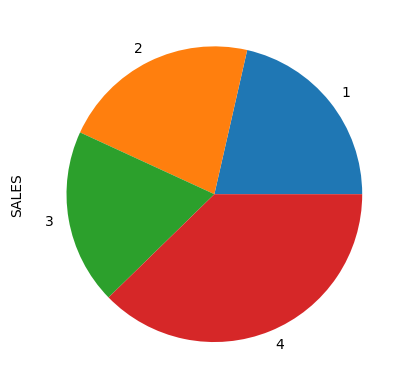

In [ ]:
stat.groupby('QTR_ID')['SALES'].sum().plot.pie()

<Axes: xlabel='PRODUCTLINE'>

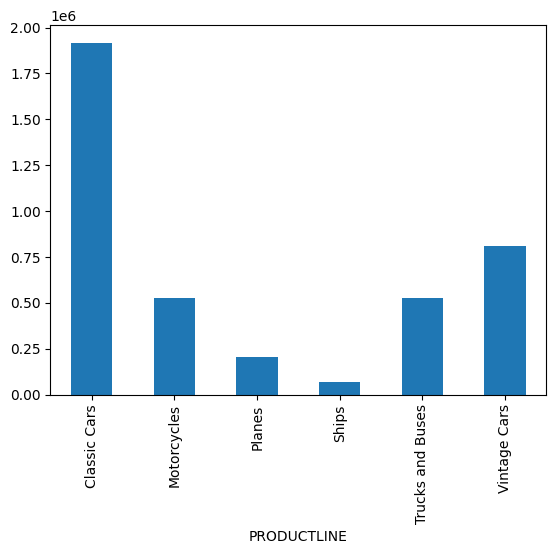

In [ ]:
stat.groupby('PRODUCTLINE')['SALES'].sum().plot(kind='bar')

<Axes: xlabel='DEALSIZE'>

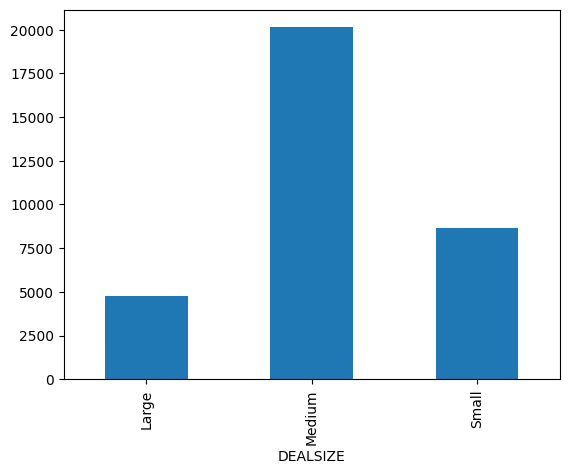

In [ ]:
stat.groupby('DEALSIZE')['QUANTITYORDERED'].sum().plot(kind='bar')

<Axes: xlabel='COUNTRY'>

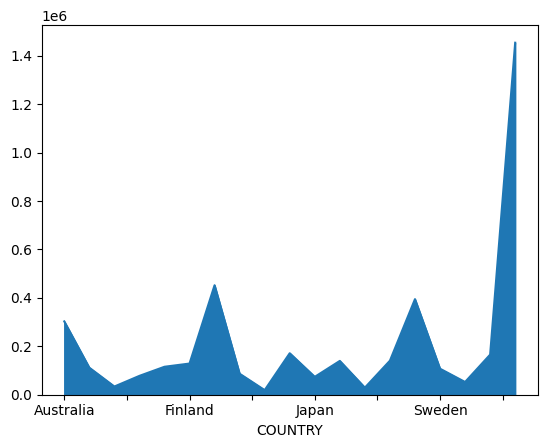

In [ ]:
stat.groupby('COUNTRY')['SALES'].sum().plot(kind='area')

<Axes: xlabel='PRODUCTLINE'>

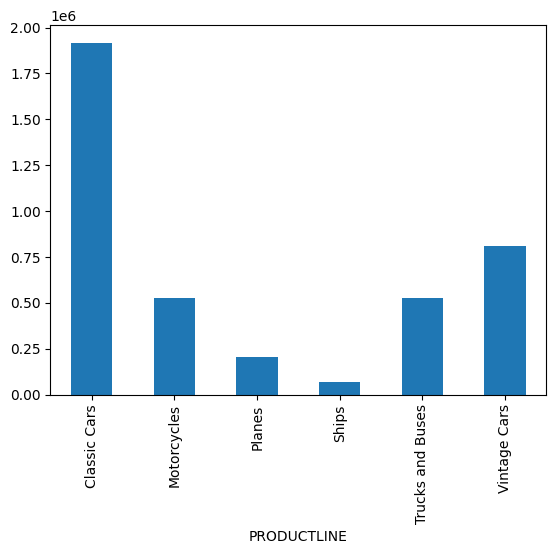

In [ ]:
stat.groupby('PRODUCTLINE')['SALES'].sum().plot(kind='bar')

<Axes: xlabel='MONTH_ID'>

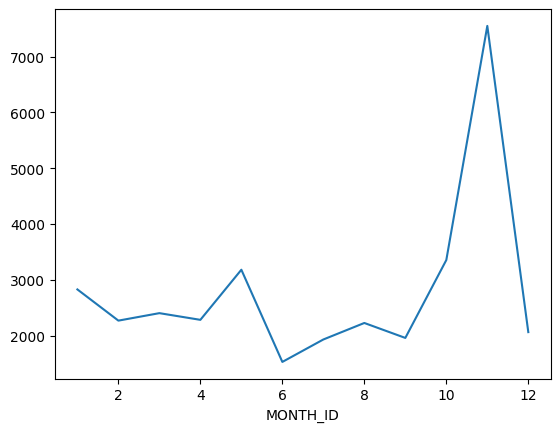

In [ ]:
stat.groupby('MONTH_ID')['QUANTITYORDERED'].sum().plot(kind='line')

<Axes: ylabel='QUANTITYORDERED'>

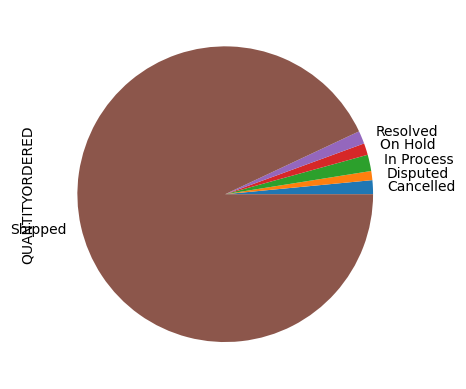

In [ ]:
stat.groupby('STATUS')['QUANTITYORDERED'].sum().plot(kind='pie')